In [2]:
username = "Alex"
env = "integrate"
pathtorepo = "C:\\Users\\" *username *  "\\Desktop\\"
using Pkg
Pkg.activate(pathtorepo * "dynamical-systems\\env\\" * env * "\\")
include(pathtorepo * "dynamical-systems\\system.jl")

  Activating project at `C:\Users\Alex\Desktop\dynamical-systems\env\integrate`

rate_jac (generic function with 1 method)

In [3]:
using JLD2, CairoMakie, GLMakie

In [4]:
cd("C:\\Users\\Alex\\Desktop\\dynamical-systems\\Tsodyks Markram\\Levanova\\3 набор параметров\\Сопоставление с матконт\\файлы matlab")
I0_hom = load("I0_hom_hom.jld")["data"]
u0_hom = load("U0_hom_hom.jld")["data"]
I0_hom = I0_hom[:]
u0_hom = u0_hom[:]

I0_hom_st = load("I0_hom_stump.jld")["data"]
u0_hom_st = load("U0_hom_stump.jld")["data"]
I0_hom_st = I0_hom_st[:]
u0_hom_st = u0_hom_st[:]

I0_Fold = load("I0_Fold.jld")["data"]
U0_Fold = load("U0_Fold.jld")["data"]
I0_Fold = I0_Fold[:]
U0_Fold = U0_Fold[:]

I0_hom_bt = load("I0_hom_bt.jld")["data"]
U0_hom_bt = load("U0_hom_bt.jld")["data"]
I0_hom_bt = I0_hom_bt[:]
U0_hom_bt = U0_hom_bt[:];

In [85]:
cd("C:\\Users\\Alex\\Desktop\\dynamical-systems\\")
len = 400
map_dim = " $(len)x$(len) "
name = " tau_D article2 HopfFold zoom"
format = ".jld2"
namefile_LSE = "LSE" * map_dim * name * format
namefile_u0s = "u0s" * map_dim * name * format

Λs = load(namefile_LSE)
Λs = Λs["Λs"]
u0s = load(namefile_u0s)
u0s = u0s["u0s"]

I0range = range( -1.0, -2.0, length = len );
U0range = range(0.3, 0.16, length = len);

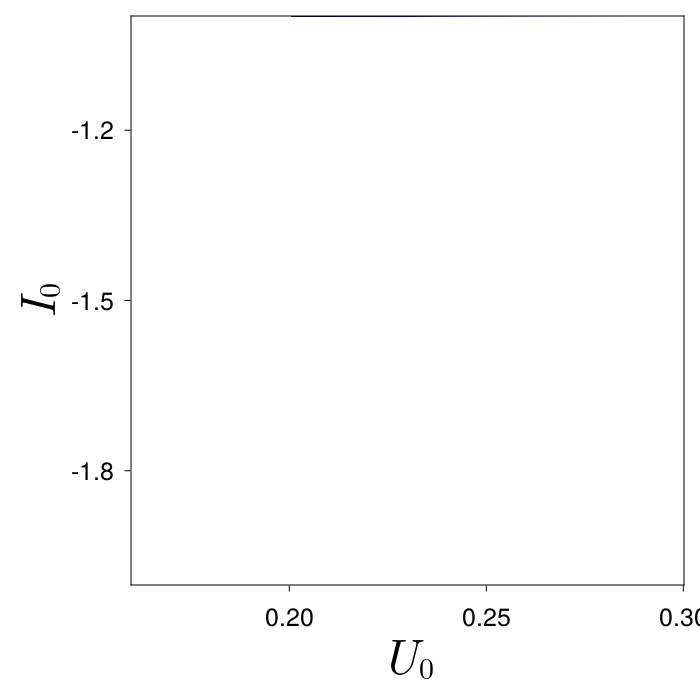

In [86]:
index = 1
absmax = maximum(abs.(Λs[:, :, index]))

mn, mx =  -absmax, absmax

I0start, I0end = 1, len

U0start, U0end = 1, len

CairoMakie.activate!()
f = Figure(resolution = (700, 700))
ticksize = 25
tickpad = 10.0
textsize = 25

ax = Axis(f[1, 1], xlabel = L"U_0",ylabel = L"I_0", xlabelsize = 50, ylabelsize = 50,
            xticklabelsize = ticksize, yticklabelsize = ticksize,
            xgridvisible  = false, ygridvisible = false,
            xticklabelpad = tickpad, yticklabelpad = tickpad)

hm = heatmap!(ax, U0range[U0start:U0end], I0range[I0start:I0end], transpose(Λs[I0start:I0end, U0start:U0end, index]),
colormap = :seismic, colorrange = (mn, mx))

display(f);

In [57]:
GLMakie.activate!()
display(GLMakie.Screen(), f);

In [ ]:
"""pathtosave = "C:\\Users\\Alex\\Desktop\\TM images"
filename = "\\map_with_curve.eps"
fullpath = pathtosave * filename 
save(fullpath, f)"""